|Name:|Tufan Kundu|
|--|--|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:| 1|
|Date:|17 July,2025|

## Q1. Using McCulloch Pitts model discussed in the class, write a Python code to implement the OR and AND Boolean functions. Also, plot the boundary input points and the linear classifier that we get in that case.


### OR GATE

In [3]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
def or_func(x1,x2):
    x_or = []
    for i in range(len(x1)):
        if x1[i] == 0 and x2[i] == 0:
            x_or.append(0)
        else:
            x_or.append(1)
    return x_or
x_or = or_func(x1,x2)
g_or = [x1[i]+x2[i] for i in range(len(x1))]


In [4]:
y_or = []
for i in range(len(x1)):
    if g_or[i]>=1:
        y_or.append(1)
    else:
        y_or.append(0)

In [5]:
y_or

[0, 1, 1, 1]

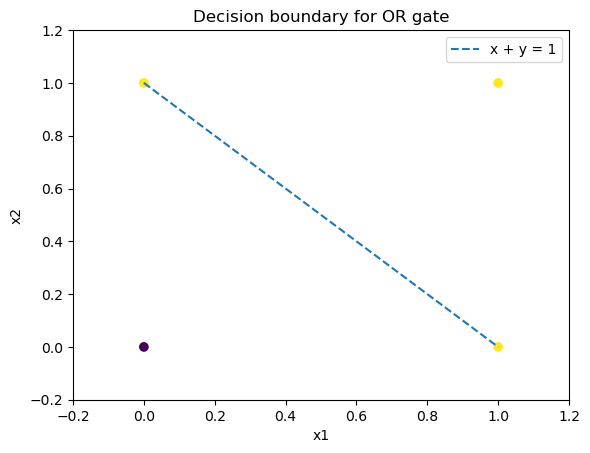

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
plt.scatter(x1,x2, c = y_or)
x = np.linspace(0, 1, 100)
y = 1 - x
plt.plot(x, y, label='x + y = 1', linestyle = '--')
plt.title("Decision boundary for OR gate")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### AND GATE

In [7]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
def and_func(x1,x2):
    x_and = []
    for i in range(len(x1)):
        if x1[i] == 1 and x2[i] == 1:
            x_and.append(1)
        else:
            x_and.append(0)
    return x_and
x_and = and_func(x1,x2)
g_and = [x1[i]+x2[i] for i in range(len(x1))]


In [8]:
y_and = []
for i in range(len(x1)):
    if g_and[i]>=2:
        y_and.append(1)
    else:
        y_and.append(0)

In [9]:
y_and

[0, 0, 0, 1]

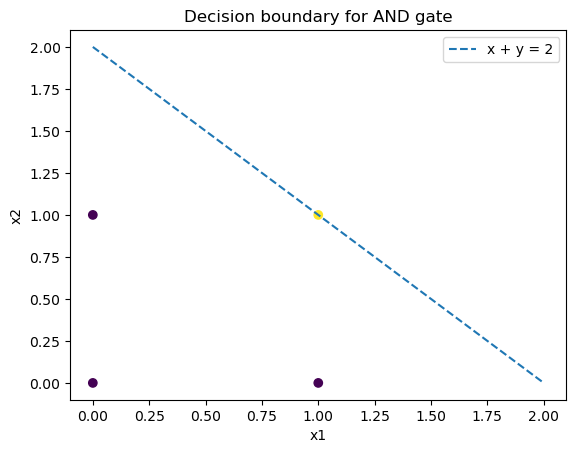

In [ ]:
plt.scatter(x1,x2, c = y_and)
x = np.linspace(0, 2, 100)
y = 2 - x
plt.plot(x, y, label='x + y = 2', linestyle = '--')
plt.title("Decision boundary for AND gate")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Q2. Write a Python code to implement the Perceptron Learning Algorithm to implement OR, AND, NAND, NOR logic Gates and report the weights and bias. Also, print the inputs and outputs after training the weights properly. Further plot the linear classifier that you have obtained as well. Note that here the input vectors x should be extended with a x0 term, which is taken as 1. Assume we have two inputs x1 and x2 so the x vector would be [1, x1, x2]

In [18]:
# Inputs
x1_input = np.array([0, 0, 1, 1])
x2_input = np.array([0, 1, 0, 1])
x_bias = np.ones_like(x1_input)
X = np.vstack([x_bias, x1_input, x2_input]).T

# Target
Y = {
    "AND": np.array([0, 0, 0, 1]),
    "OR": np.array([0, 1, 1, 1]),
    "NAND": np.array([1, 1, 1, 0]),
    "NOR": np.array([1, 0, 0, 0])
}



In [ ]:
# Perceptron algorithm
def perceptron(X, y, lr=1, max_epochs=100):
    w = np.random.rand(X.shape[1]) - 0.5
    # Initializing weights in range [-0.5, 0.5) to allow both positive and negative starting values for better learning dynamics
    for epoch in range(max_epochs):
        error = False
        for i in range(len(y)):
            y_pred = 1 if np.dot(w, X[i]) >= 0 else 0
            if y_pred != y[i]:
                w += lr * (y[i] - y_pred) * X[i]
                error = True
        if not error:
            break
    return w

In [20]:
# Plotting function
def plot_decision_boundary(w, X, y, title):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k', s=100)
    x1 = np.linspace(-0.2, 1.2, 100)
    x2 = (-w[0] - w[1] * x1) / w[2]
    plt.plot(x1, x2, '--k', label='Decision Boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.show()


Training for AND Gate
Weights learned: [-2.06947714  1.93114466  0.44063735]
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


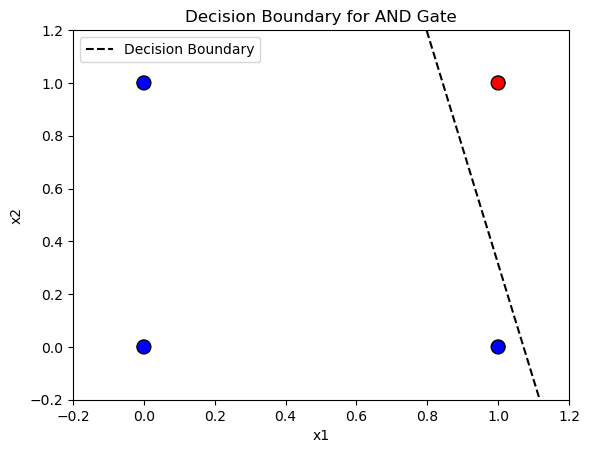


Training for OR Gate
Weights learned: [-0.20260487  1.04147655  0.20438916]
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


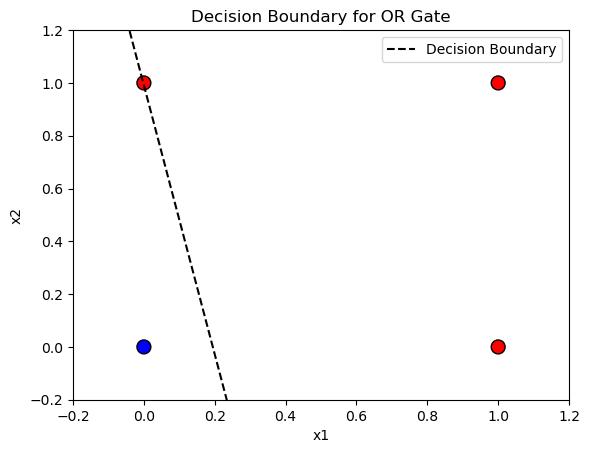


Training for NAND Gate
Weights learned: [ 2.33472299 -1.41041355 -1.27903201]
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


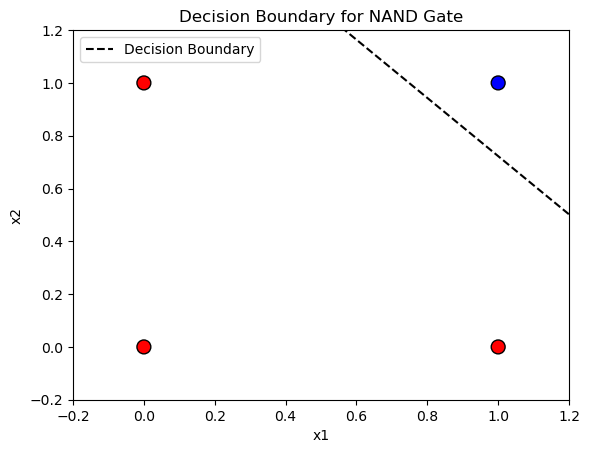


Training for NOR Gate
Weights learned: [ 0.3339123  -0.55186556 -0.53088407]
Input: [0 0], Output: 1
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 0


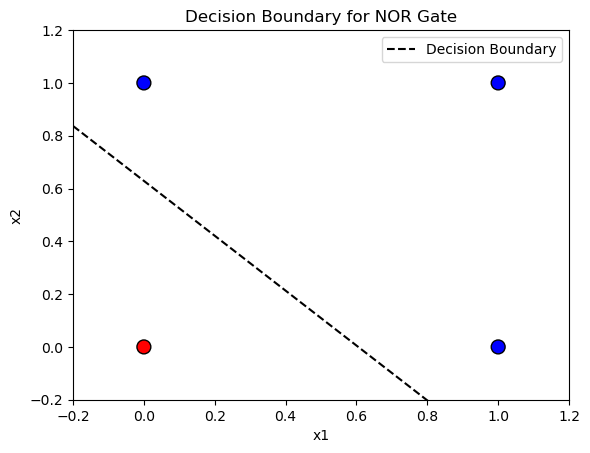

In [24]:
# Training and plot for each gate
for gate, y_true in Y.items():
    print(f"\nTraining for {gate} Gate")
    w_final = perceptron(X, y_true)
    print(f"Weights learned: {w_final}")
    outputs = []
    for i in range(len(X)):
        output = 1 if np.dot(w_final, X[i]) >= 0 else 0
        outputs.append(output)
        print(f"Input: {X[i][1:]}, Output: {output}")
        
    plot_decision_boundary(w_final, X, y_true, f"Decision Boundary for {gate} Gate")


## Q3. Next we will see how we can implement an XOR function using inbuild tools.

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

## Building MLP model
model = Sequential()
model.add(Dense(4,input_dim = 2, activation = 'sigmoid')) 
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

model.fit(x,y, epochs = 2000, verbose = 1)
print("XOR Function-- predictions:")
predictions = model.predict(x)
print(predictions)

C:\Users\TUFAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - accuracy: 0.2500 - loss: 0.7049
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2500 - loss: 0.7048
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2500 - loss: 0.7046
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2500 - loss: 0.7044
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2500 - loss: 0.7043
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2500 - loss: 0.7041
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2500 - loss: 0.7040
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2500 - loss: 0.7038
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2500 - loss: 0.7037
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - loss: 0.7036
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2500 - loss: 0.7034
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy